In [2]:
# 使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中
# 或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。
# inline表示将图表嵌入到Notebook中
%matplotlib inline
import random  # 随机梯度下降和随机初始化权重
import torch
from d2l import  torch as d2l

torch.normal()
torch.normal(means, std, out=None)
返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。 均值means是一个张量，包含每个输出元素相关的正态分布的均值。 std是一个张量，包含每个输出元素相关的正态分布的标准差。 均值和标准差的形状不须匹配，但每个张量的元素个数须相同。

参数:

means (Tensor) – 均值
std (Tensor) – 标准差
out (Tensor) – 可选的输出张量


我们从一个标准正态分布N～(0,1)，提取一个2x2的矩阵
torch.normal(mean=0.,std=1.,size=(2,2))
输出
tensor([[-1.3306, -1.0588],
        [-0.3331, -0.7722]])


numpy中reshape函数的三种常见相关用法

reshape(1,-1)转化成1行：

reshape(2,-1)转换成两行：

reshape(-1,1)转换成1列：

reshape(-1,2)转化成两列


In [3]:
a = torch.normal(mean=0.,std=1.,size=(2,3))
a

tensor([[ 0.5925, -0.1844, -0.4177],
        [ 0.5166,  0.6599, -0.6254]])

In [10]:
# 构造数据集
def generate_data(w, b, examples_num):
    # Y = X*w + b + noise
    X = torch.normal(0, 1,(examples_num, len(w)))  # 最后输出一个examples_num * len（w）的样本tensor
    # print( " X ", X)
    # torch.matmul()若两个tensor都是一维的，则返回两个向量的点积运算结果
    Y = torch.matmul(X,w) + b
    # print( " Y ", Y)
    Y += torch.normal(0, 0.01, Y.shape)
    return X, Y.reshape((-1, 1))  # 把Y做成一个列向量返回

true_w = torch.tensor([1.5, 2.8])
true_b = 3.33
features, labels = generate_data(true_w, true_b, 1000)

tensor.detach()

detach()
从计算图中脱离出来。

detach()的官方说明如下：

Returns a new Tensor, detached from the current graph. The result will never require gradient.
假设有模型A和模型B，我们需要将A的输出作为B的输入，但训练时我们只训练模型B. 那么可以这样做：

input_B = output_A.detach()
它可以使两个计算图的梯度传递断开，从而实现我们所需的功能。

返回一个新的tensor，新的tensor和原来的tensor共享数据内存，但不涉及梯度计算，即requires_grad=False。修改其中一个tensor的值，另一个也会改变，因为是共享同一块内存，但如果对其中一个tensor执行某些内置操作，则会报错，例如resize_、resize_as_、set_、transpose_。

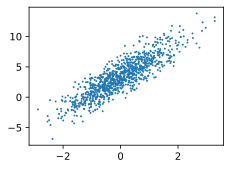

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);

1.python内置函数range(开始，结束，间隔）
      注意：生成的最后一个数小于结束值，间隔需要为整数类型，range返回的是range类对象，需要用list()转换为list

In [40]:
# 每次选取batch_size个样本和标签
def get_one_batch_size_data(batch_size, features, labels):
    sample_size = len(features)
    indexes = list(range(sample_size))
    random.shuffle(indexes) # 打乱样本
    for i in range(0, sample_size, batch_size):
        batch_indexes = torch.tensor(indexes[i : min(i + batch_size, sample_size)])
        # print(batch_indexes)
        yield features[batch_indexes], labels[batch_indexes]  # 这里还有些问题
    # print(indexes)


batch_size = 10
for X, Y in get_one_batch_size_data(10, features, labels):
    print(X, "\n", Y)
    break

tensor([[-1.0351e+00, -1.6415e-01],
        [-6.3704e-01,  2.2433e-01],
        [ 6.9567e-02,  4.4246e-01],
        [-2.5902e-02,  1.6629e+00],
        [ 1.3947e-01, -3.1757e-02],
        [ 1.4200e+00,  1.0583e+00],
        [ 1.2893e-03, -1.5571e+00],
        [-1.4813e+00,  3.4016e-01],
        [-4.2978e-01,  7.8118e-01],
        [-1.6573e+00, -4.3710e-01]]) 
 tensor([[ 1.3277],
        [ 2.9892],
        [ 4.6778],
        [ 7.9570],
        [ 3.4553],
        [ 8.4182],
        [-1.0356],
        [ 2.0511],
        [ 4.8649],
        [-0.3820]])


In [47]:
# 定义初始化模型参数
w = torch.normal(0, 0.01, size = (2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad=True)

# 定义模型
def linreg(X, w, b):
    # 计算 y = w * x + b
    return torch.matmul(X, w) + b

# 定义损失函数
def squared_loss(y_hat, y):
    # 均方损失
    return (y_hat - y.reshape(y_hat.shape))**2 / 2  # y_hat 和 y 之间可能会有尺寸不一样的问题  这里做一个尺度转换

# 定义优化算法
def sgd(para_list, lr, batch_size):
    # 小样本随机梯度下降
    # 更新的时候不需要参与梯度计算
    with torch.no_grad():
        for para in para_list:
            # 除以batch_size 的原因是 loss是 batch_size个数据的loss之和所以要平均一下
            para -= lr * para.grad / batch_size
            para.grad.zero_()  # 手动把梯度设为0 这样本次计算梯度就不会和上次相关了

python的print字符串前面加f表示格式化字符串，加f后可以在字符串里面使用用花括号括起来的变量和表达式，如果字符串里面没有表达式，那么前面加不加f输出应该都一样

格式化的字符串文字前缀为’f’和接受的格式字符串相似str.format()。

In [50]:
lr = 0.001
epochs_num = 10
net = linreg
loss = squared_loss

for epoch in range(epochs_num):
    for  X, y in get_one_batch_size_data(batch_size, features, labels):
        # l 是长为一个batch_size 的向量，尺寸为（“batch——size，1）
        l = loss(net(X, w, b), y)
        # 对损失进行求和之后再计算梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    # 不需要计算梯度，所以接下来的步骤都放在no_grad里面
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 1.219667
epoch 2, loss 1.006077
epoch 3, loss 0.829983
epoch 4, loss 0.684786
epoch 5, loss 0.565046
epoch 6, loss 0.466296
epoch 7, loss 0.384847
epoch 8, loss 0.317660
epoch 9, loss 0.262232
epoch 10, loss 0.216500
epoch 11, loss 0.178764
epoch 12, loss 0.147621
epoch 13, loss 0.121919
epoch 14, loss 0.100703
epoch 15, loss 0.083188
epoch 16, loss 0.068729
epoch 17, loss 0.056790
epoch 18, loss 0.046931
epoch 19, loss 0.038790
epoch 20, loss 0.032065
epoch 21, loss 0.026510
epoch 22, loss 0.021921
epoch 23, loss 0.018129
epoch 24, loss 0.014997
epoch 25, loss 0.012408
epoch 26, loss 0.010268
epoch 27, loss 0.008500
epoch 28, loss 0.007038
epoch 29, loss 0.005830
epoch 30, loss 0.004831
epoch 31, loss 0.004005
epoch 32, loss 0.003321
epoch 33, loss 0.002756
epoch 34, loss 0.002289
epoch 35, loss 0.001903
epoch 36, loss 0.001583
epoch 37, loss 0.001318
epoch 38, loss 0.001100
epoch 39, loss 0.000918
epoch 40, loss 0.000769
epoch 41, loss 0.000645
epoch 42, loss 0.000542
e

In [51]:
print(w)

tensor([[1.5000],
        [2.8003]], requires_grad=True)
